<a href="https://colab.research.google.com/github/k1mhyungseok/team_prj/blob/main/easyOCR_%EB%B0%8F_%EC%98%A4%ED%83%80_%EB%AA%A8%EB%93%88_%EB%B0%98%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##easyocr로 메뉴판 이미지에서 텍스트를 골라내고 단어의 정확도를 높이기 위해 symspellpy-ko, 부산대 맞춤법 링크 활용함  
##깃에 있는 'image_easyocr_1.py' 파일의 일부 보완(단어의 정확도)  
##symspellpy-ko는 단어 사전이 '뉴스' 기사를 배경으로 구현되어 있어서 음식이름의 오타 및 맞춤법을 골라내기에는 한계가 있음

In [ ]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
! git clone https://github.com/JaidedAI/EasyOCR.git

Cloning into 'EasyOCR'...
remote: Enumerating objects: 2655, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 2655 (delta 59), reused 92 (delta 57), pack-reused 2542
Receiving objects: 100% (2655/2655), 152.92 MiB | 13.99 MiB/s, done.
Resolving deltas: 100% (1584/1584), done.
Updating files: 100% (305/305), done.


In [ ]:
! git clone https://github.com/HeegyuKim/symspellpy-ko.git

Cloning into 'symspellpy-ko'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 46 (delta 14), reused 39 (delta 11), pack-reused 0
Receiving objects: 100% (46/46), 18.07 MiB | 17.90 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
pip list

In [ ]:
import cv2

In [ ]:
import numpy as np
import random
import easyocr
import matplotlib.pyplot as plt

reader = easyocr.Reader(['ko','en']) # need to run only once to load model into memory
result = reader.readtext('/content/menu.jpg')
img    = cv2.imread('/content/menu.jpg')

np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(255, 3), dtype="uint8")


for i in result :
    x = i[0][0][0]
    y = i[0][0][1]
    w = i[0][1][0] - i[0][0][0]
    h = i[0][2][1] - i[0][1][1]

    color_idx = random.randint(0,255)
    color = [int(c) for c in COLORS[color_idx]]

    cv2.putText(img, str(i[1]), (int((x + x + w) / 2) , y-2), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    img = cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)

plt.show("test",img)
cv2.waitKey(0)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

-1

In [ ]:
# import matplotlib.image as img
# from PIL import Image
# img_test = Image.open(img)
# plt.imshow(img_test)
# plt.show()

In [ ]:
import re

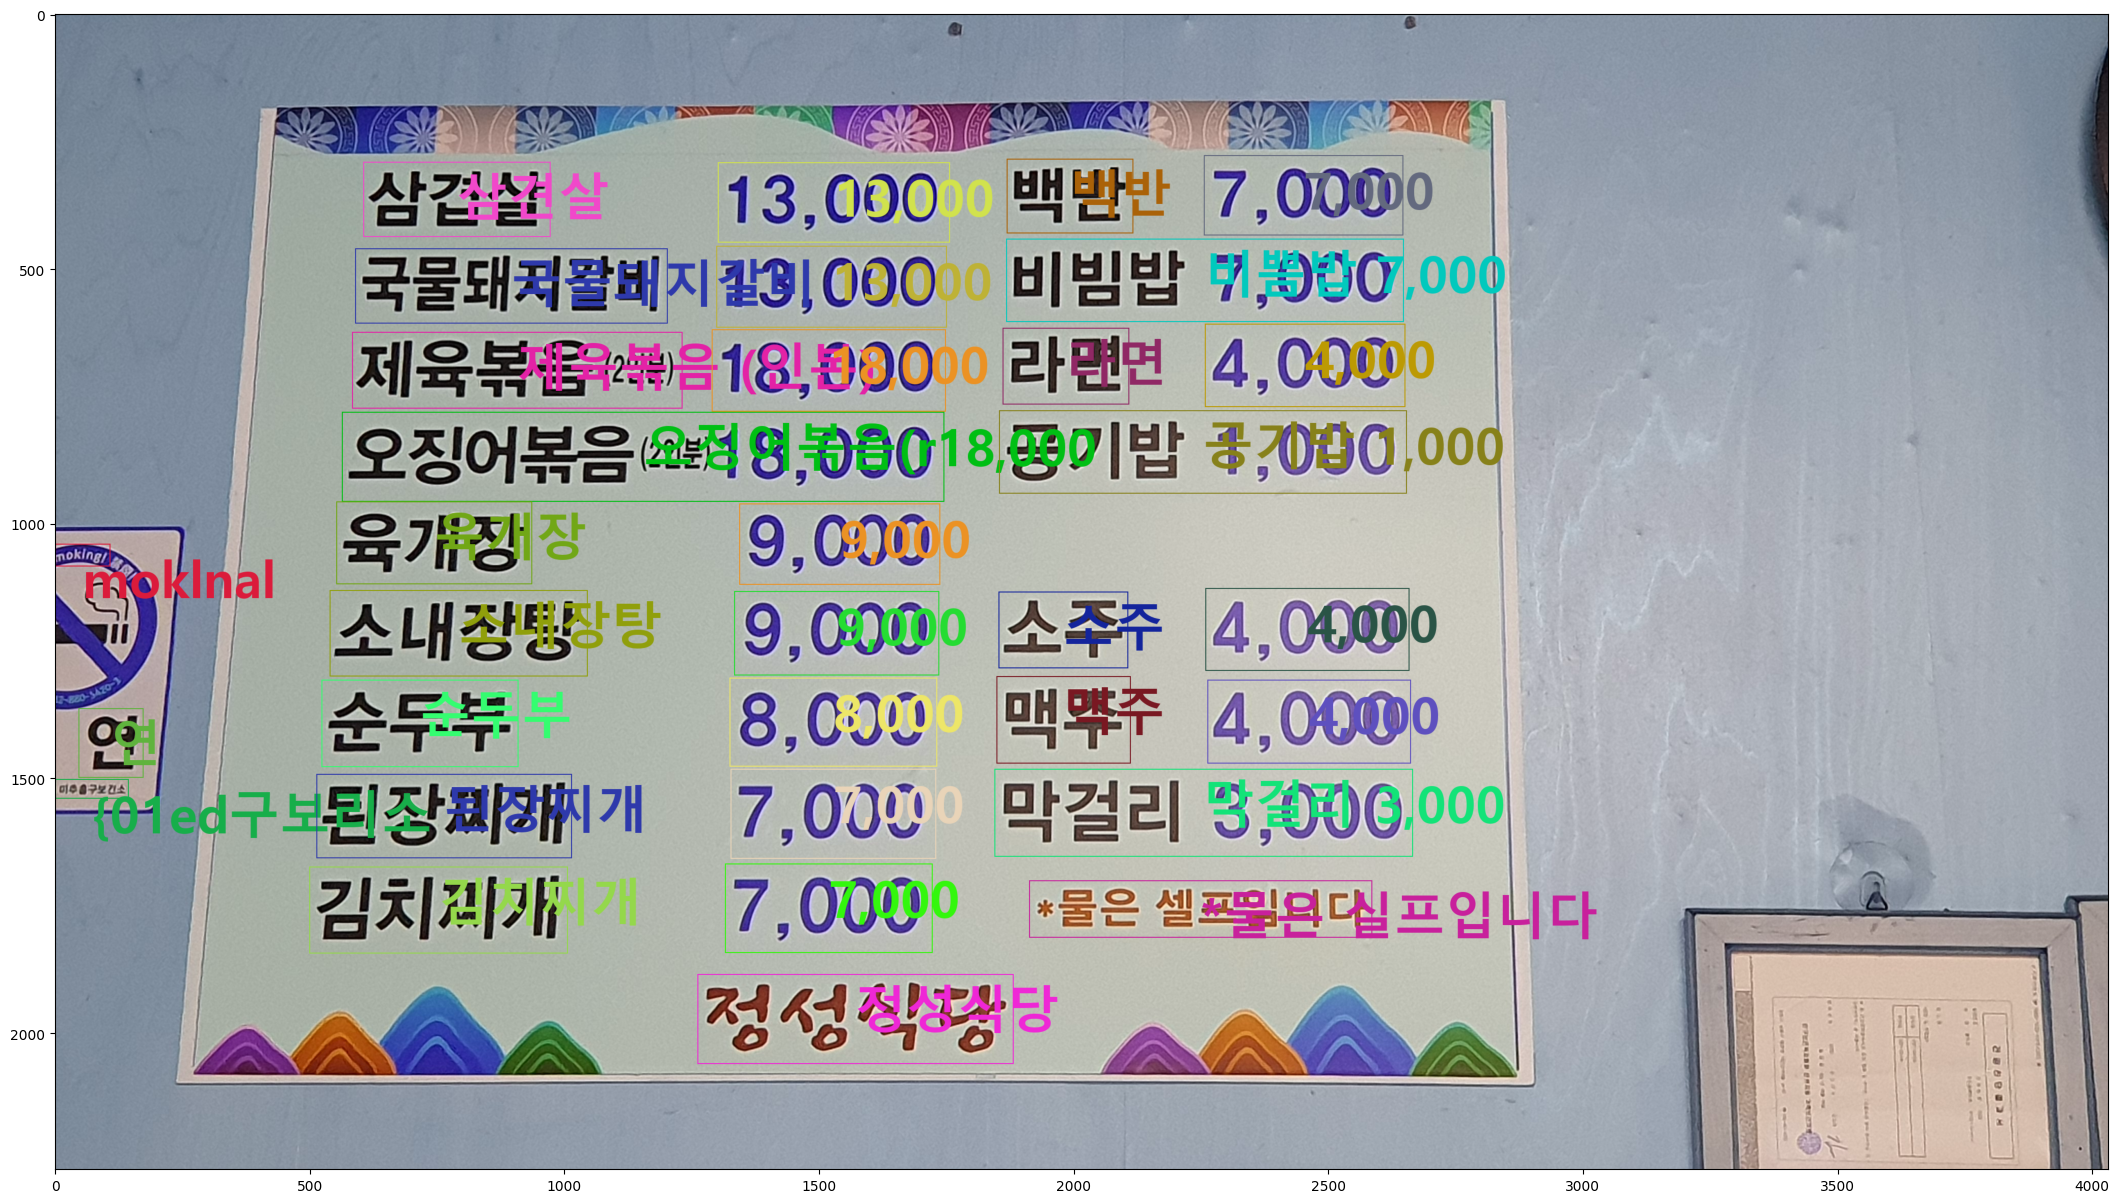

In [ ]:
# import easyocr
# import numpy as np
# import cv2
# import random
# import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

#숫자, 영어 제거 함수
# def clean_text(inputString):
#   re_text = re.sub(r'[0-9\.,\s,A-Z,a-z,-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·,{}]', ' ', inputString)
#   return re_text

reader = easyocr.Reader(['ko','en']) # need to run only once to load model into memory
result = reader.readtext('/content/menu.jpg')
img = cv2.imread('/content/menu.jpg')

img = Image.fromarray(img)
font = ImageFont.truetype("/content/malgunbd.ttf",100)
draw = ImageDraw.Draw(img)

np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")


for i in result :
    x = i[0][0][0]
    y = i[0][0][1]
    w = i[0][1][0] - i[0][0][0]
    h = i[0][2][1] - i[0][1][1]

    color_idx = random.randint(0,254)
    color = [int(c) for c in COLORS[color_idx]]

#    cv2.putText(img, str(i[1]), (int((x + x + w) / 2) , y-2), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
#    img = cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
    draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)
    draw.text((int((x + x + w) / 2) , y-2),str(i[1]), font=font, fill=tuple(color),)

plt.figure(figsize=(30,15))
plt.imshow(img)
plt.show()
# cv2.imshow("test",img)
# cv2.waitKey(0)

In [ ]:
import numpy as np
import pandas as pd
import easyocr
import re
#숫자, 영어 제거 함수
def clean_text(inputString):
  re_text = re.sub(r'[0-9\.,\s,A-Z,a-z,-=+,#/\?:^.@*\"※~ㆍ!』‘|\(\)\[\]`\'…》\”\“\’·,{}]', ' ', inputString)
  return re_text

reader = easyocr.Reader(['ko','en']) # need to run only once to load model into memory
result = reader.readtext('/content/menu.jpg')
df = pd.DataFrame(result)
text = df[1]
MenuName = np.array(text)
MenuName = ' '.join(MenuName)
MenuName

re_name = clean_text(MenuName)
re_name = ' '.join(re_name.split())


In [ ]:
re_name

'삼견살 백반 국물돼지갈비 비쁨밥 제육볶음 인본 라면 오징어볶음 공기밥 육개장 소내장탕 소주 연 순두부 맥주 구보리소 된장찌개 막걸리 김치찌개 물은 실프입니다 정성식당'

In [ ]:
#글자 하나 하나씩 분리되서 리스트에 들어감

# lst = []

# for i in re_name:
#   lst.append(i)

# lst

#symspellpy-ko 활용
##fail
###학습된 단어 사전이 뉴스기반이라 음식 이름과 동떨어져 있음  
다른 플젝할 때 사용하면 유용할 듯

In [ ]:
! pip install symspellpy-ko

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 64.0 MB/s eta 0:00:00


In [ ]:
from symspellpy_ko import KoSymSpell, Verbosity

sym_spell = KoSymSpell()
sym_spell.load_korean_dictionary(decompose_korean=True, load_bigrams=True)

In [ ]:
term = re_name

for suggestion in sym_spell.lookup(term, Verbosity.ALL):
  print(suggestion.term, suggestion.distance, suggestion.count)

안녕하세요


In [ ]:
term = "안뇽하새요"

for suggestion in sym_spell.lookup(term, Verbosity.ALL):
  print(suggestion.term, suggestion.distance, suggestion.count)

안녕하세요 2 3692


#부산대 어쩌고 활용

In [ ]:
#일단 re_name을 text 파일로 저장하기
file = open("rename.txt", "w")
file.write(re_name)
file.close()

In [ ]:
import requests
import json
from pprint import pprint  #python에서 json 파일 보기 좋게 만드는 import

# 1. 텍스트 준비 & 개행문자 처리
with open('rename.txt', 'r', encoding='utf-8') as f:
    text = f.read()
text = text.replace('\n', '\r\n')
# 2. 맞춤법 검사 요청 (requests)
response = requests.post('http://164.125.7.61/speller/results', data={'text1': text})
# 3. 응답에서 필요한 내용 추출 (html 파싱)
data = response.text.split('data = [', 1)[-1].rsplit('];', 1)[0]
# 4. 파이썬 딕셔너리 형식으로 변환
data = json.loads(data)
# 5. 교정 내용 출력
pprint(data['errInfo'])

[{'candWord': '삼겹살',
  'correctMethod': 1,
  'end': 3,
  'errMsg': '',
  'errorIdx': 0,
  'help': '입력 오류입니다.',
  'orgStr': '삼견살',
  'start': 0},
 {'candWord': '국물 돼지갈비',
  'correctMethod': 1,
  'end': 13,
  'errMsg': '',
  'errorIdx': 1,
  'help': '띄어쓰기 오류입니다. 대치어를 참고하여 띄어 쓰도록 합니다.',
  'orgStr': '국물돼지갈비',
  'start': 7},
 {'candWord': '바쁨 밥',
  'correctMethod': 1,
  'end': 17,
  'errMsg': '',
  'errorIdx': 2,
  'help': '철자 검사를 해 보니 이 어절은 분석할 수 없으므로 틀린 말로 판단하였습니다.<br/><br/>후보 어절은 이 '
          '철자검사/교정기에서 띄어쓰기, 붙여 쓰기, 음절대치와 같은 교정방법에 따라 수정한 결과입니다.<br/><br/>후보 어절 '
          '중 선택하시거나 오류 어절을 수정하여 주십시오.<br/><br/>* 단, 사전에 없는 단어이거나 사용자가 올바르다고 '
          '판단한 어절에 대해서는 통과하세요!!',
  'orgStr': '비쁨밥',
  'start': 14},
 {'candWord': '인본이라면',
  'correctMethod': 4,
  'end': 28,
  'errMsg': '',
  'errorIdx': 3,
  'help': '명사 다음에 붙는 조사로 받침이 없을 때는 &apos;라고&apos;, &apos;라니&apos;, '
          '&apos;라며&apos;, &apos;라도&apos;로 쓰지만 받침이 있을 때는 &apos;이라고, '
          '&apos;이라니&apos;, &apos;이라며&apos;, &apos;이라도&

In [ ]:
for err in data['errInfo']:
    print(f"입력 내용 : {err['orgStr']}")
    print(f"대치어 : {err['candWord']}")
    #print(f"도움말 : {err['help']}")
    print("\n")

입력 내용 : 삼견살
대치어 : 삼겹살


입력 내용 : 국물돼지갈비
대치어 : 국물 돼지갈비


입력 내용 : 비쁨밥
대치어 : 바쁨 밥


입력 내용 : 인본 라면
대치어 : 인본이라면


입력 내용 : 공기밥
대치어 : 공깃밥


입력 내용 : 소내장탕
대치어 : 소 내장탕


입력 내용 : 구부리소 된장찌개
대치어 : 구부리고 된장찌개|구부리소. 된장찌개


입력 내용 : 셀프입니다 정성식당
대치어 : 셀프입니다. 정성식당|실파입니다 정성식당


